In [1]:
!pip install numpy pandas scikit-learn matplotlib

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor  # Use Regressor instead of Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df=pd.read_csv('/kaggle/input/crop-yield-prediction1/crop yield prediction.csv')
# Creating the DataFrame
de=pd.DataFrame(df)
print(de)

                Crop  Precipitation (mm day-1)  \
0       Cocoa, beans                   2248.92   
1       Cocoa, beans                   1938.42   
2       Cocoa, beans                   2301.54   
3       Cocoa, beans                   2592.35   
4       Cocoa, beans                   2344.72   
..               ...                       ...   
151  Rubber, natural                   2308.51   
152  Rubber, natural                   2410.13   
153  Rubber, natural                   2967.41   
154  Rubber, natural                   2333.46   
155  Rubber, natural                   2109.34   

     Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                   17.72                              83.40   
1                                   17.54                              82.11   
2                                   17.81                              82.79   
3                                   17.61                              85.07   

In [4]:
# Identify categorical columns and apply Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns  # Identify all categorical columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [5]:
# Select features and target variable
X = df[['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
        'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]  # Features
y = df['Yield']  # Target variable

# Check if 'Yield' is numerical or categorical
if df['Yield'].dtype == 'object':
    raise ValueError("Yield should be a numerical column for regression. Check your dataset.")

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize or Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=30, min_samples_split=3, min_samples_leaf=1, random_state=42)

In [7]:
# Train the Decision Tree Model
dt_model.fit(X_train_scaled, y_train)

# Predict using Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)

In [8]:
# Evaluate Decision Tree Model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt:.4f}")
print(f"Decision Tree R² Score: {r2_dt:.4f}")

Decision Tree MSE: 30282105.1094
Decision Tree R² Score: 0.9922


In [9]:
# Try a Different Model: Random Forest Regressor to rreduce Overfitting.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

In [10]:
# Evaluate Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest MSE: 21679390.6935
Random Forest R² Score: 0.9944


In [11]:
# Visualize Actual vs. Predicted Results
def plot_results(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    
    # Ensure axes have the same scale
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())

    # Scatter plot of actual vs predicted values
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
    
    # Perfect prediction reference line
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Fit")

    # Labels and title
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.title(f'Actual vs Predicted Crop Yield ({model_name})')

    # Force equal scaling
    plt.axis("equal")  
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

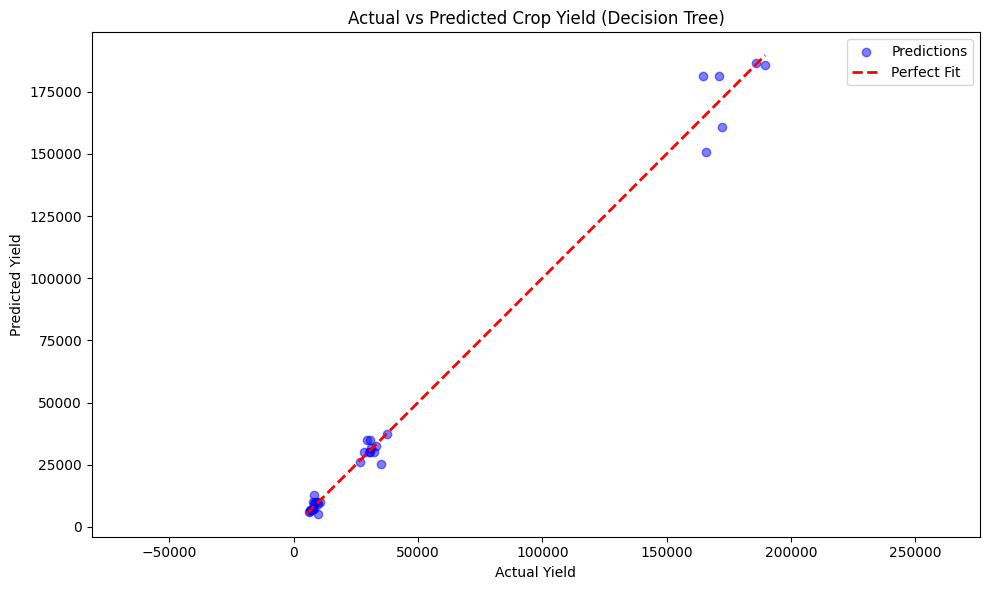

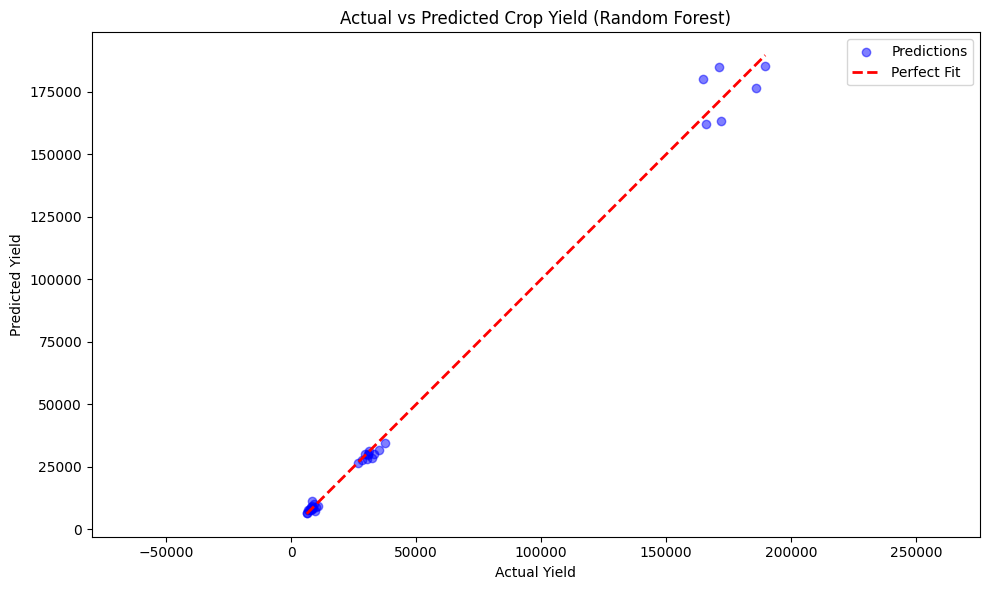

In [12]:
# Plot results for both models
plot_results(y_test, y_pred_dt, "Decision Tree")
plot_results(y_test, y_pred_rf, "Random Forest")

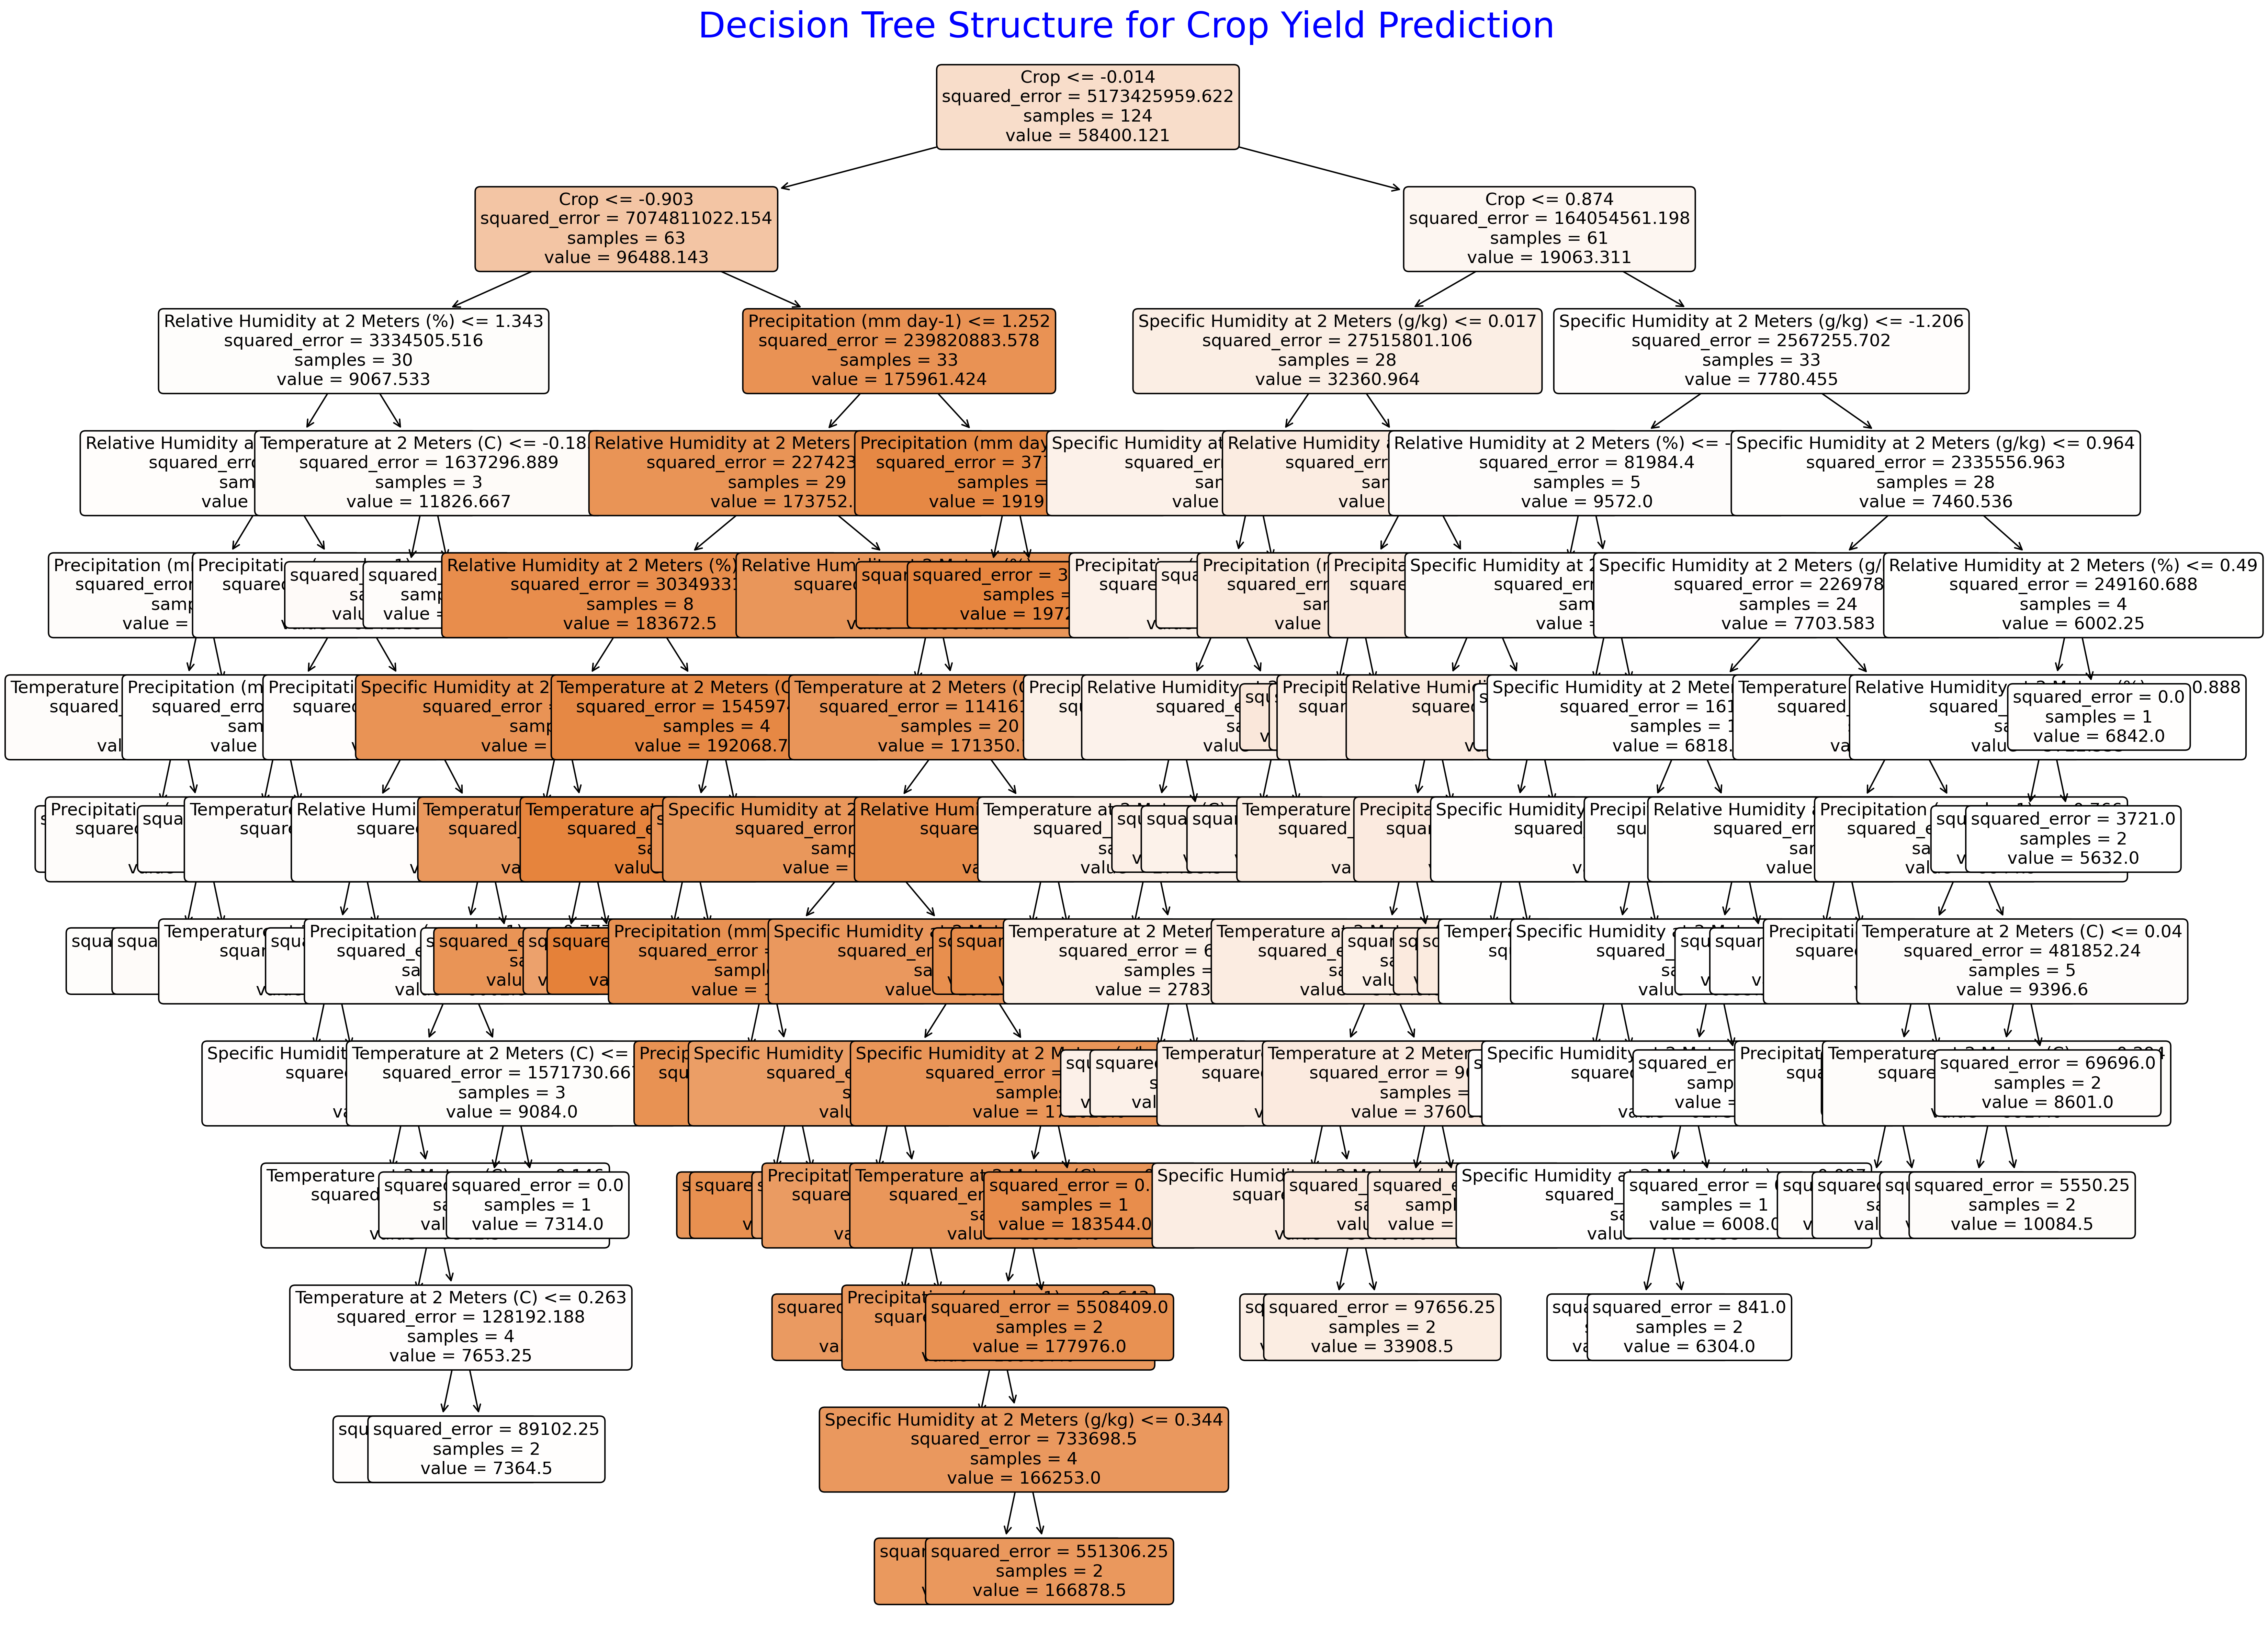

In [13]:
# Set a larger figure size and higher resolution
plt.figure(figsize=(25, 20), dpi=300)

# Plot the Decision Tree with enhanced visibility
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=12)

# Set a meaningful title
plt.title("Decision Tree Structure for Crop Yield Prediction", color='blue',  fontsize=25)

# Save the figure for better sharing and analysis
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [14]:
# Make a new prediction (example input)
new_data = pd.DataFrame({
    'Crop': [1],  # Example encoded category for Crop
    'Precipitation (mm day-1)': [10],
    'Specific Humidity at 2 Meters (g/kg)': [15],
    'Relative Humidity at 2 Meters (%)': [80],
    'Temperature at 2 Meters (C)': [25]
})

In [15]:
# Scale the new input data
new_data_scaled = scaler.transform(new_data)

In [16]:
# Predict yield using both models
new_pred_dt = dt_model.predict(new_data_scaled)
new_pred_rf = rf_model.predict(new_data_scaled)

print(f"Decision Tree Prediction: {new_pred_dt[0]:.2f}")
print(f"Random Forest Prediction: {new_pred_rf[0]:.2f}")

Decision Tree Prediction: 201436.00
Random Forest Prediction: 190970.39
